<h1>Entonces ¿Qué tan viejo es el universo? </h1>

In [ ]:
#install.packages("gamair")

* La fórmula <b>y ~ x - 1</b> le indica a R que ajuste un modelo lineal utilizando la variable <b>x</b> como predictor y la variable <b>y</b> como respuesta, pero sin incluir un término de intercepción. Esto significa que el modelo buscará la mejor línea de ajuste que pase a través del <b>origen (0,0)</b> en el espacio de las variables <b>x</b> e <b>y</b>.

In [4]:
library(gamair)
data(hubble)
hub.mod <- lm(y~x-1, data=hubble)

In [5]:
hubble

,Galaxy,y,x
,<fct>,<int>,<dbl>
1,NGC0300,133,2.00
2,NGC0925,664,9.16
3,NGC1326A,1794,16.14
4,NGC1365,1594,17.95
5,NGC1425,1473,21.88
6,NGC2403,278,3.22
7,NGC2541,714,11.22
8,NGC2090,882,11.75
9,NGC3031,80,3.63


Se utiliza la función <b>summary()</b> para obtener un resumen del modelo lineal ajustado, que incluye coeficientes estimados, estadísticas de ajuste y significancia.

In [6]:
summary(hub.mod)


Call:
lm(formula = y ~ x - 1, data = hubble)

Residuals:
   Min     1Q Median     3Q    Max 
-736.5 -132.5  -19.0  172.2  558.0 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   76.581      3.965   19.32 1.03e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 258.9 on 23 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9394 
F-statistic: 373.1 on 1 and 23 DF,  p-value: 1.032e-15


* Encontramos que <b>β = 76.581</b> y <b>σ = 3.965</b>

Es importante revisar que se cumplan las suposiciones del modelo

* Examinar los residuales para verificar son independientes y tienen las misma varianza
* Graficamos: $$\hat{ϵ_i} = y_i − \hat{μ_i} \hspace{0.3cm} vs. \hspace{0.3cm} \hat{μ_i} = \hat{β}x_i$$

Se utiliza la función 
* <b>plot()</b> para graficar los valores ajustados contra los residuos del modelo lineal. 
* <b>fitted(hub.mod)</b> devuelve los valores ajustados por el modelo
* <b>residuals(hub.mod)</b> devuelve los residuos del modelo.

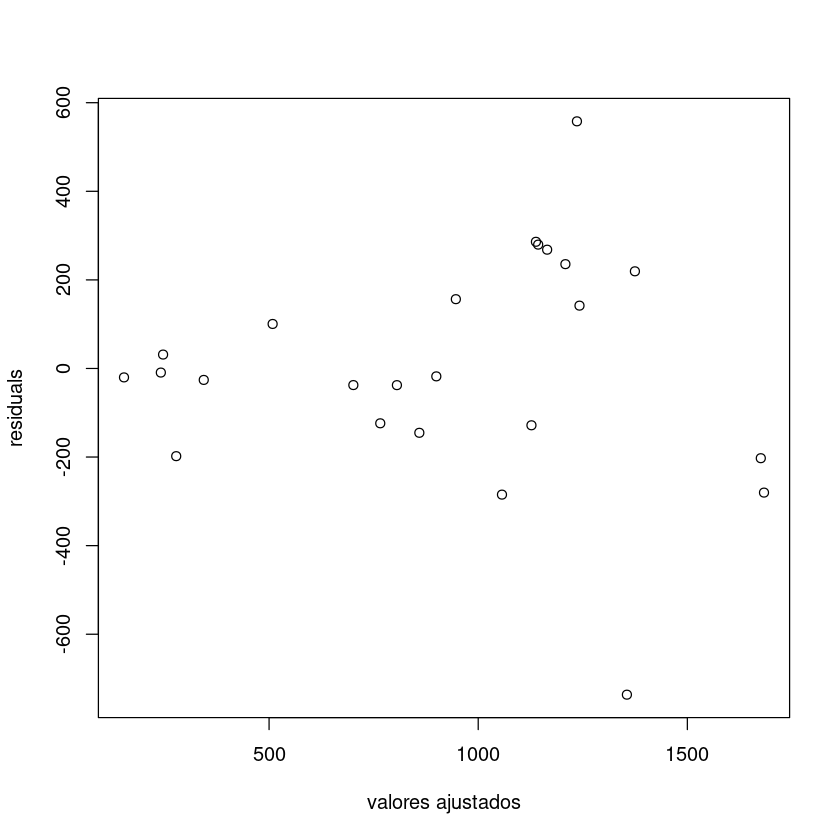

In [7]:
plot(fitted(hub.mod), residuals(hub.mod), xlab="valores ajustados", ylab="residuals")

* Observamos dos puntos con una magnitud de residuales muy grande
* Es conveniente repetir el ajuste sin estos datos atípicos

In [8]:
print(residuals(hub.mod))

          1           2           3           4           5           6 
 -20.162344  -37.483536  557.979883  219.367962 -202.596044   31.408626 
          7           8           9          10          11          12 
-145.240750  -17.828771 -197.989654 -284.820174 -123.811720  -37.633930 
         13          14          15          16          17          18 
 100.501018  268.200373 -736.486745  286.003784  141.853390  235.549105 
         19          20          21          22          23          24 
 279.643102 -280.254161  156.456714  -25.849462   -9.230692 -128.274852 


In [9]:
hub.mod1 <- lm(y~x-1, data=hubble[-c(3,15),])

summary(hub.mod1)


Call:
lm(formula = y ~ x - 1, data = hubble[-c(3, 15), ])

Residuals:
   Min     1Q Median     3Q    Max 
-304.3 -141.9  -26.5  138.3  269.8 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x    77.67       2.97   26.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.5 on 21 degrees of freedom
Multiple R-squared:  0.9702,	Adjusted R-squared:  0.9688 
F-statistic: 683.8 on 1 and 21 DF,  p-value: < 2.2e-16


* ¡El valor R^2 ajustado incremento!

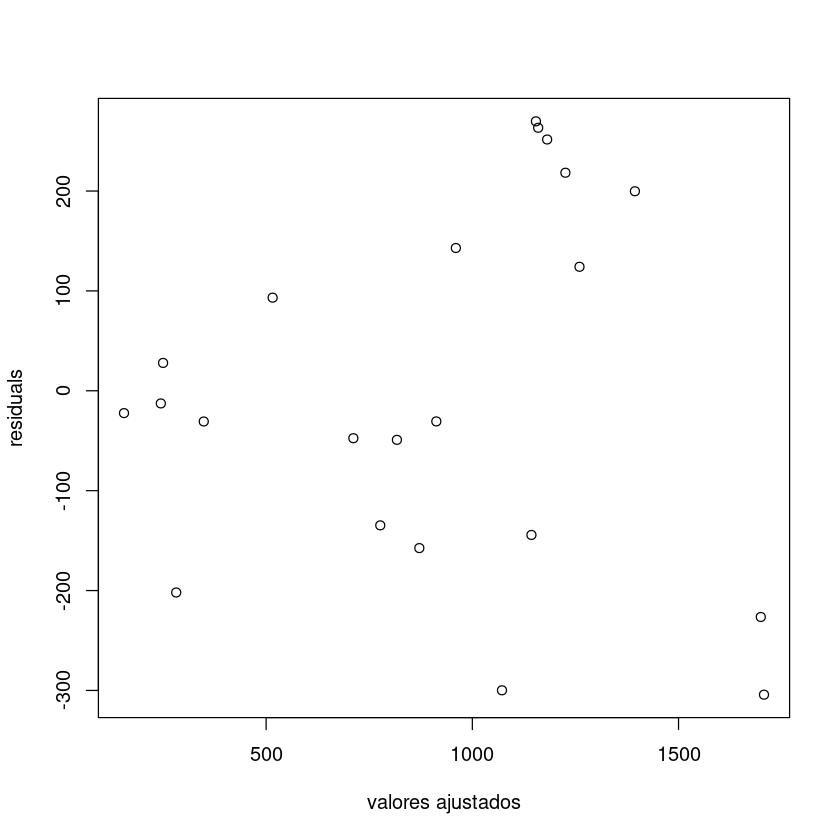

In [10]:
plot(fitted(hub.mod1), residuals(hub.mod1), xlab="valores ajustados", ylab="residuals")

* La estimación de la constante de Hubble tiene unidades (km)s−1 (Mpc)−1
* Un Mega-Parsec es igual a 3.09 × 1019km
* Necesitamos dividir β por esta cantidad para tener un estimado de la edad del universo en años.

In [11]:
hubble.const <- c(coef(hub.mod),coef(hub.mod1))/3.09e19
age_seconds <- 1/hubble.const
age_years <- age_seconds/(60^2*24*365)
print(age_years)

          x           x 
12794692825 12614854757 


* La edad del universo es cercana a 13 mil millones de años

<h3>Añadiendo suposiciones distribucionales</h3>

La estimación encontrada está basada solamente en dos suposiciones:
* (i) independencia
* (ii) varianza constante

Si queremos encontrar intervalos de confianza para β, o probar una hipótesis sobre el modelo, será necesario incluir suposiciones distribucionales

* Asuma que ϵi ∼ N(0, σ2) para toda i
* Esto es equivalente a asumir que Yi ∼ N(xiβ, σ2)
* Hemos visto que β^ es una suma pesada de Yi
* Una suma pesada de variables aleatorias gaussianas es a su vez una variable aleatoria gaussiana
* Por lo que: β^ ∼ N(β, (∑ x2 i )−1σ2)

<h3>Probando hipótesis acerca de β</h3>

* Algunos científicos creacionistas estiman que la edad del universo es alrededor de 6000 años
* Esto implicaría una β = 163 × 106
* Podemos probar la hipótesis:<br>
H0 : β = β0 <br>
H1 : β ≠ β0 <br>
Para algún valor de β0
* Si conocieramos σ2 podriamos aplicar directamente la expresión: <br>
β^ ∼ N(β, (∑ x2 i )−1σ2)
* La idea es encontrar la probabilidad de encontrar β^ si el valor verdadero fuera β0







La probabilidad que necesitamos se conoce como p-value: la probabilidad de obtener al
menos tan favorable a , como la observada, si es realmente verdadera.
En esta definición es importante distinguir entre la estimación , y el estimador
De esta manera, el p-value esta dado por:
donde , y
Una vez construido , el p-valor se puede obtener a través de la función de distribución
acumulada de la normal estándar, la cual está implementada en la mayoria de las
paqueterias de estadística
Un p-valor muy pequeño implicaría que los datos son inconsistentes con
En la práctica no es conocido, pero se puede usar mismo procedimiento simplemente
remplazando por
De esta manera, si , entonces
donde es el tamaño de muestra, , y es la ditribución con
g.l.
Por lo que podemos evaluar el p-valor a través de la expresión
Evaluemos La constante de Hubble es 163,000,000.
^ β
H1 H0
β^obs β^
p = Pr[|β^ − β0| ≥ |β^obs − β0| ∣ H0]
= Pr[ |β^−σβ^β0| ≥ |β^obσs−β^ β0| ∣ H0]
= Pr[|Z| ≥ |z|]
Z ∼ N(0, 1), z =
β^obs−β0
σ^
β
σβ^ = (∑ x2 i )−1σ2
z
H0
σ2
σ σ^
H0 : β = β0
T = ∼ t
n−1
β^−β
σ^^
β n
σ^β^ = (∑ x2 i )−1σ^2 tn−1 t
n − 1
p = Pr[|T| ≥ |t|]
H0 :

In [12]:
cs.hubble <- 163000000
sigma1 = summary(hub.mod1)$coefficients[2]

t.stat1 <- (coef(hub.mod1)-cs.hubble)/sigma1
pt(t.stat1,df=21)

x 
1.953194e-150

¿Y si añadimos los datos atípicos?

In [13]:
sigma = summary(hub.mod)$coefficients[2]
t.stat <- (coef(hub.mod)-cs.hubble)/sigma
pt(t.stat,df=21)

x 
8.406835e-148

<h3>Intervalos de confianza</h3>

* ¿Entonces que rango de valores de β son consistentes con los datos?

* Una elección común de consistencia consiste en decir que cualquier valor del parámetro es consistente con los datos si p − value ≥ 0.05 cuando se utiliza como el valor nulo en la prueba de hipótesis.

* La función qt de R nos puede ayudar a encontrar este rango de valores permitidos


 

In [14]:
qt(c(0.025,0.975),df=21)

[1] -2.079614  2.079614

* Por lo que aceptamos cualquier que cumpla β0 <br>
−2.08 ≤ β^−β0 / σ^β^ ≤ 2.08 <br>

* reescribiendo, encontramos el intervalo de confianza del 95\% de β0:<br>
β^ − 2.08σ^β^ ≤ β0 ≤ β^ + 2.08σ^β^ <br>

* En nuestro ejemplo este 95% CI para la constante de Hubble esta dada por:






In [15]:
h.ci <- coef(hub.mod1) + qt(c(0.025,0.975),df=21)*sigma1
h.ci

[1] 71.49588 83.84995

* En años terrestres:

In [16]:
h.ci <- h.ci*60^2*24*365.25/(3.09e19)
sort(1/h.ci)

[1] 11677548698 13695361072